# **Sales Prediction using Python**
---
                                                                 Name : VISHNU E
                                                                 Organization : Oasis Infobyte
                                                                 Date : 30/10/2024

## **Problem Statement**
---

Develop machine learning models to predict future sales.

### Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [77]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Exploratory Data Analysis

In [78]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [79]:
# statistical summary of the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [80]:
# checking for null values

df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [81]:
# checking for duplicate values

df.duplicated().sum()

0

In [82]:
# removing unnecessary columns

df_cleaned = df.drop(columns = 'Unnamed: 0')
df_cleaned

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


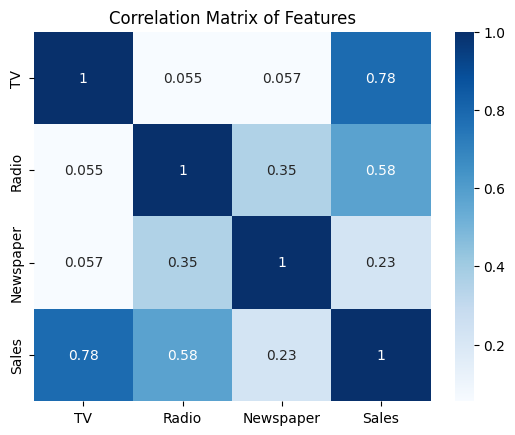

In [83]:
# # correlation matrix

sns.heatmap(df_cleaned.corr(numeric_only = True), annot = True, cmap = 'Blues')
plt.title('Correlation Matrix of Features')
plt.show()

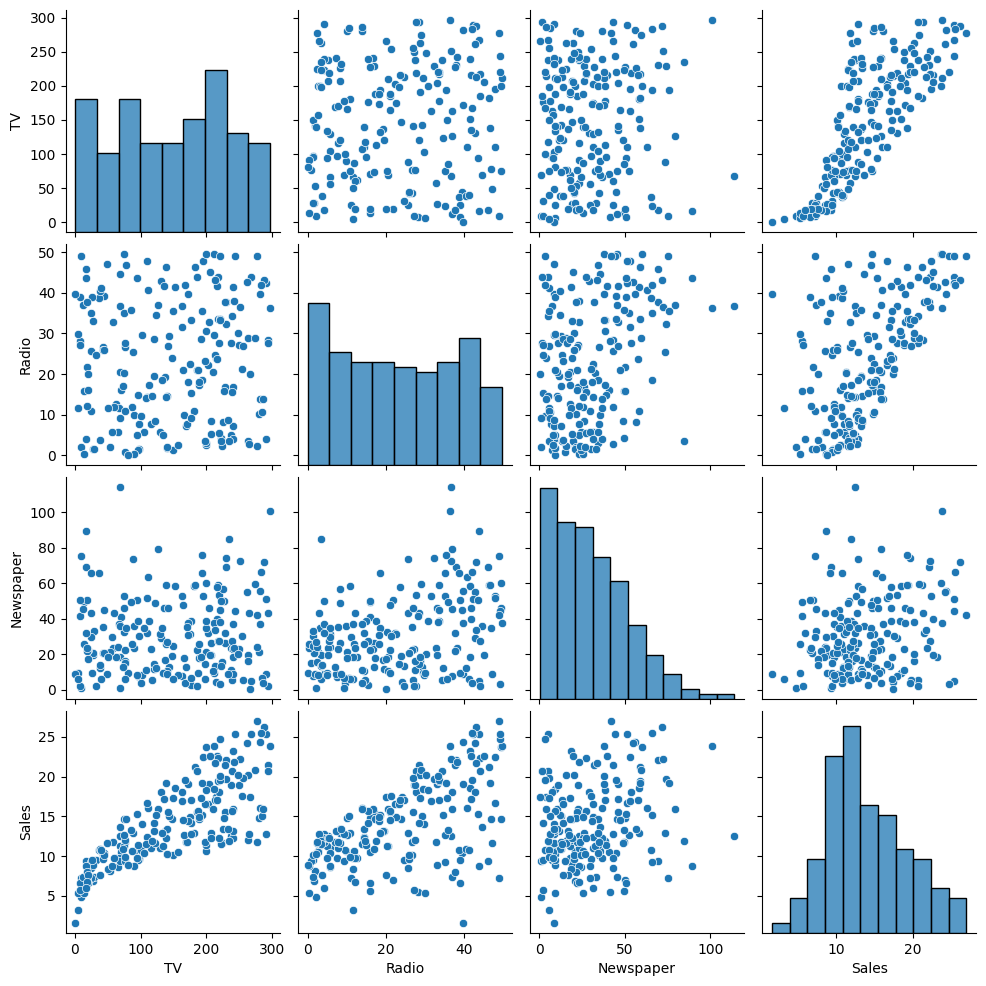

In [84]:
# pairplot of features

sns.pairplot(df_cleaned)

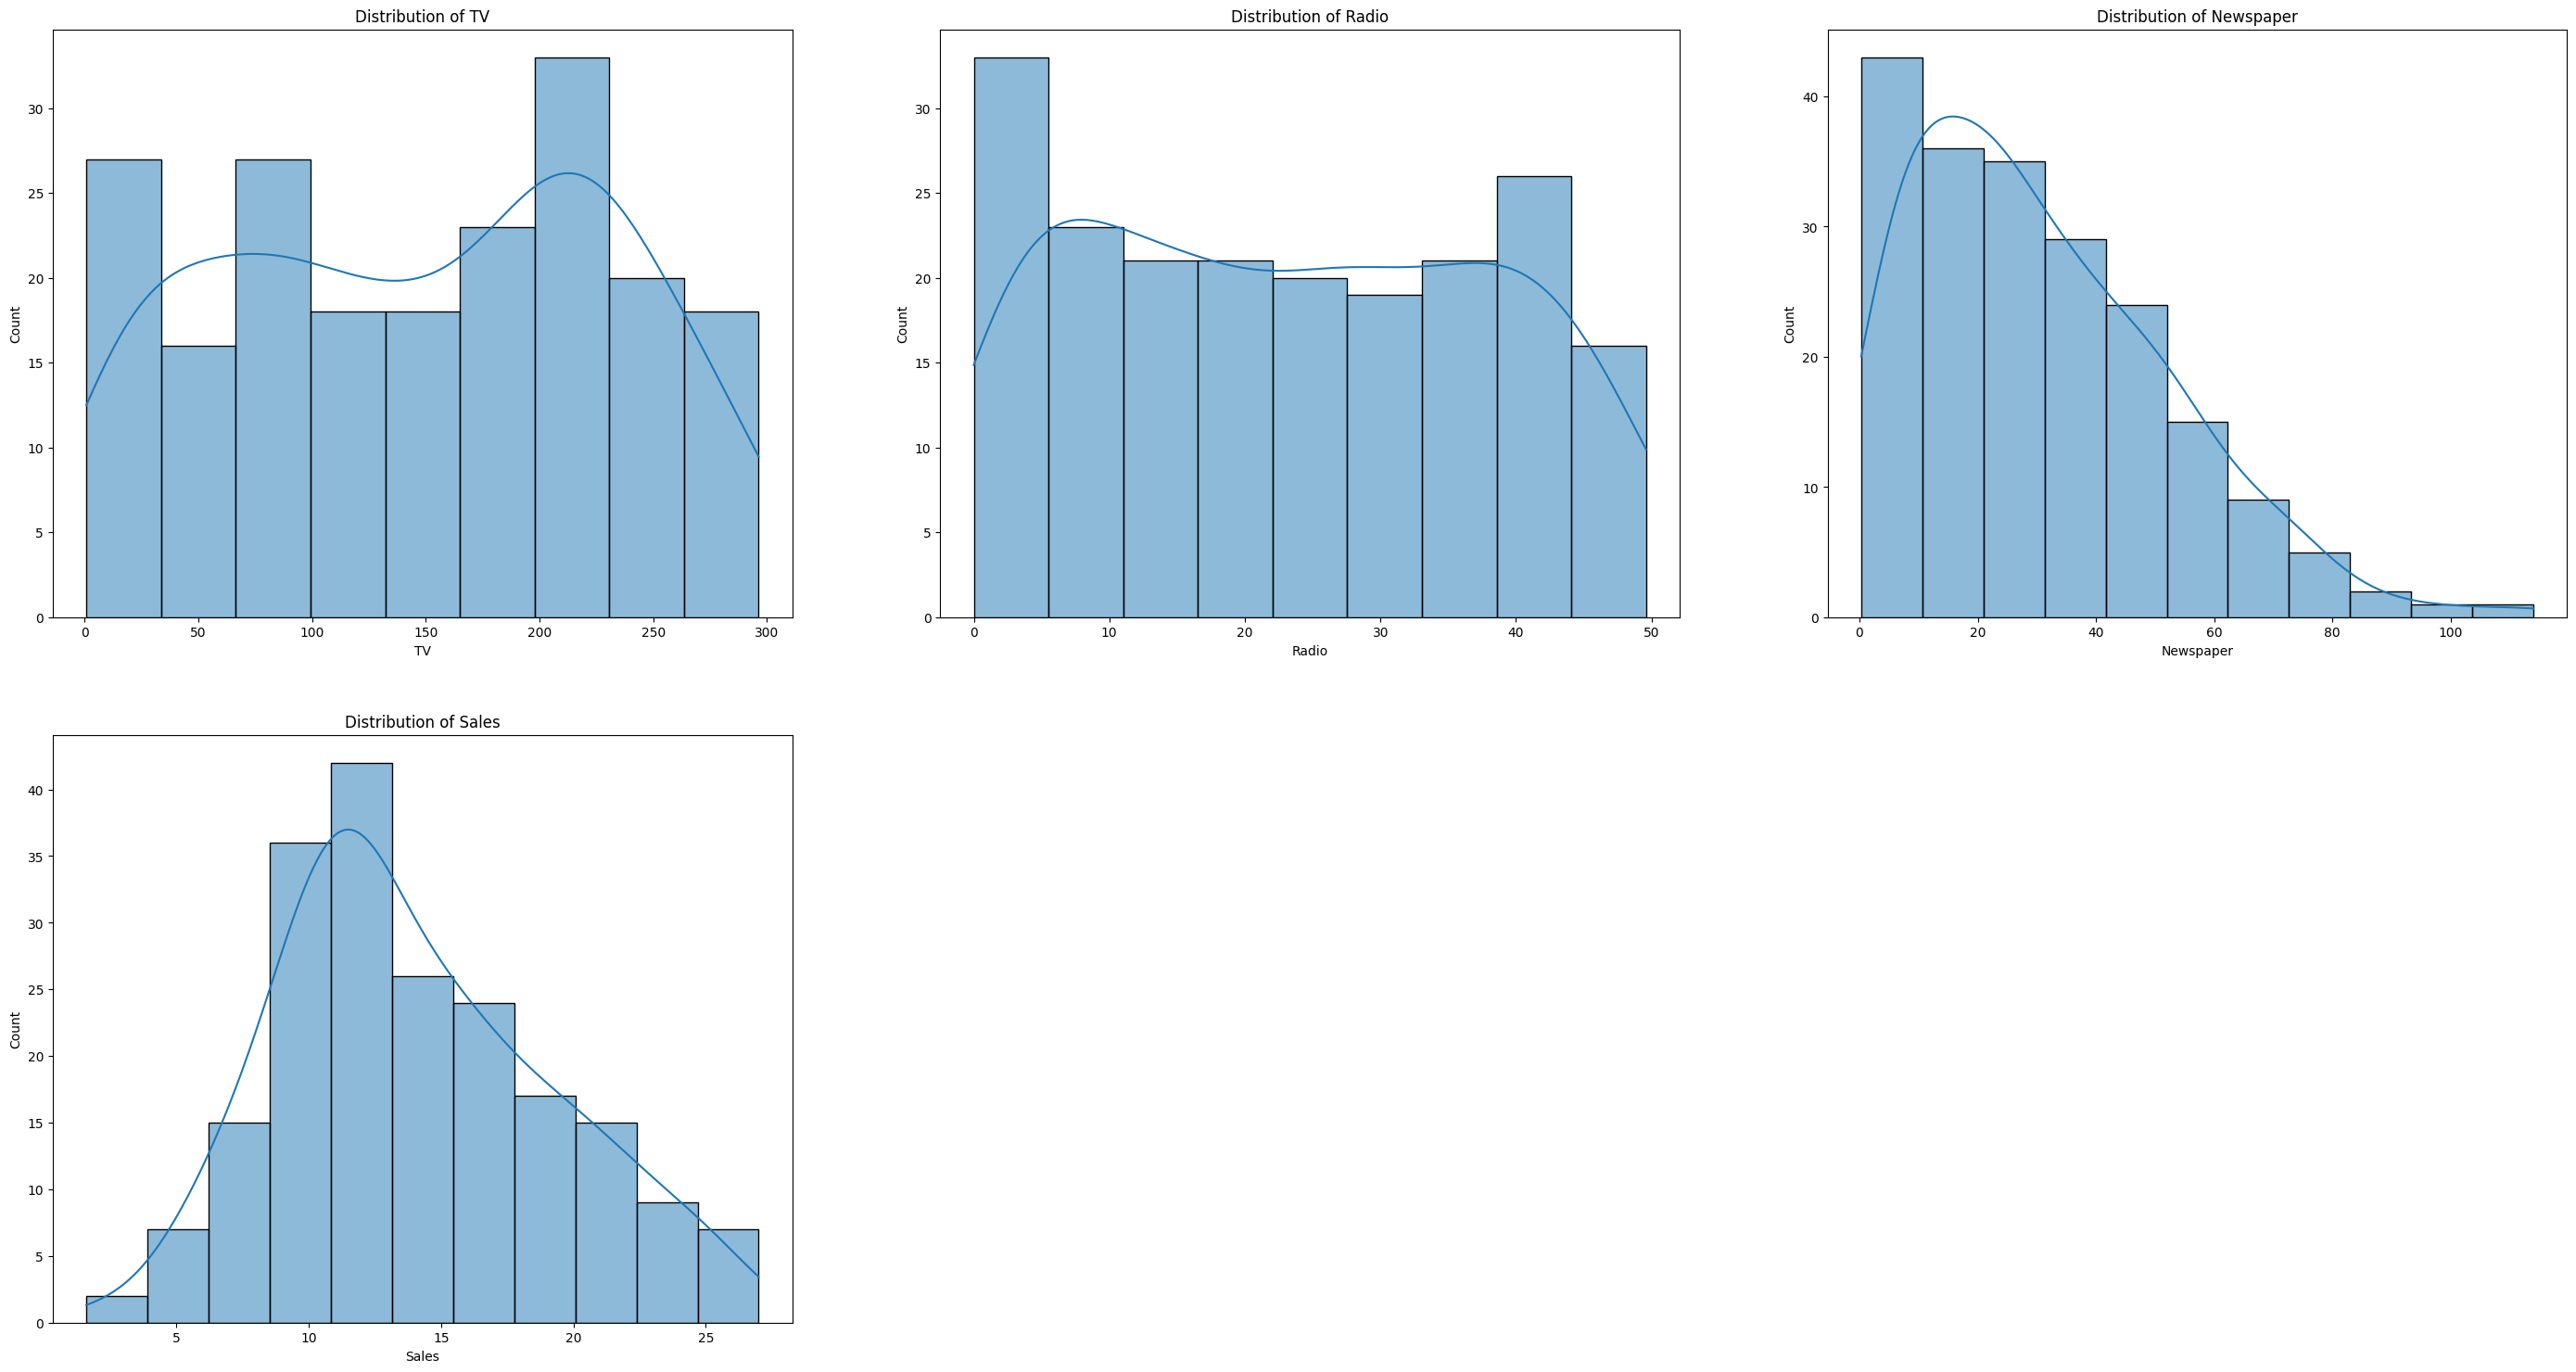

In [85]:
# histogram of features

plt.figure(figsize = (35,28))
for i, col in enumerate(df_cleaned.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df_cleaned[col], kde = True,)
    if col == 'Car_Name':
        plt.xticks(rotation = 'vertical')
    else:
        plt.xticks(rotation = 0)
    plt.title(f'Distribution of {col}')

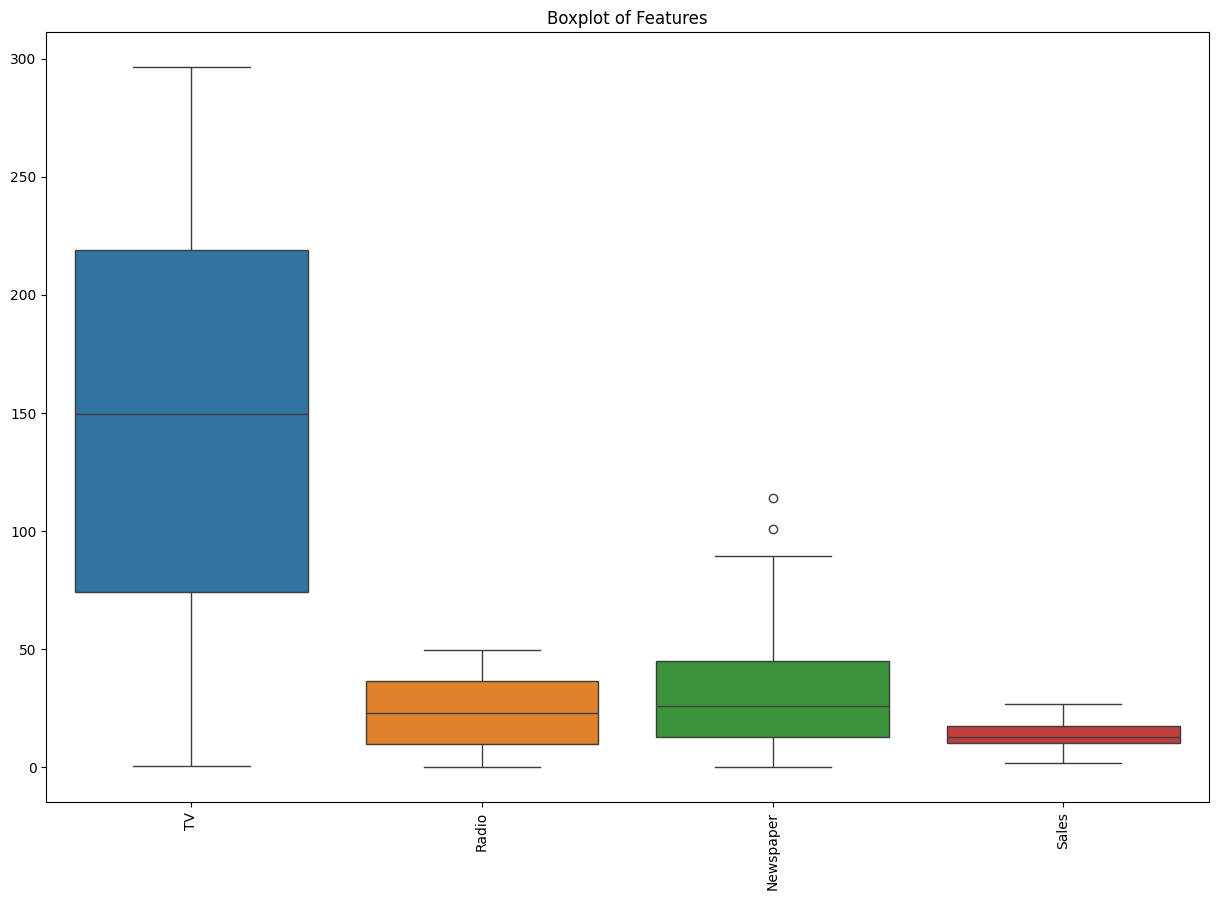

In [86]:
# Boxplot of features

plt.figure(figsize = (15,10))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
sns.boxplot(data = df_cleaned)
plt.show()

In [87]:
# checking for outliers

required_columns = df_cleaned.columns

for i in required_columns:

    q1 = df_cleaned[i].quantile(0.25)
    q3 = df_cleaned[i].quantile(0.75)
    iqr = q3 - q1

    lower_whisker_value = q1 - 1.5 * iqr
    upper_whisker_value = q3 + 1.5 * iqr

    outliers_iqr = (df_cleaned[i] < lower_whisker_value) | (df_cleaned[i] > upper_whisker_value)

# Print indices of outliers
    print(f'{i} - Outliers:', outliers_iqr.sum())

TV - Outliers: 0
Radio - Outliers: 0
Newspaper - Outliers: 2
Sales - Outliers: 0


In [88]:
# checking zeros count

zeros_count = (df_cleaned == 0).sum()

# Display the count of 0's for each column
print("Count of 0's in Each Column:")
print(zeros_count)

Count of 0's in Each Column:
TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64


### Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()

X = df_cleaned.drop(columns = 'Sales')
y = df_cleaned['Sales']

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### Dateset Splitting, Model Building and Evaluation

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X1 = X_scaled

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store results
results = {
    "Model": [],
    "RMSE": [],
    "R2_Score": []
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results["Model"].append(model_name)
    results["RMSE"].append(rmse)
    results["R2_Score"].append(r2)

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,RMSE,R2_Score
0,Linear Regression,1.781600,0.899438
1,Ridge Regression,1.787420,0.898780
2,Lasso Regression,1.791870,0.898275
3,Random Forest,0.768651,0.981281
4,Decision Tree,1.474788,0.931091
5,Gradient Boosting,0.728591,0.983182
